file1.wav is stereo. Averaging channels.


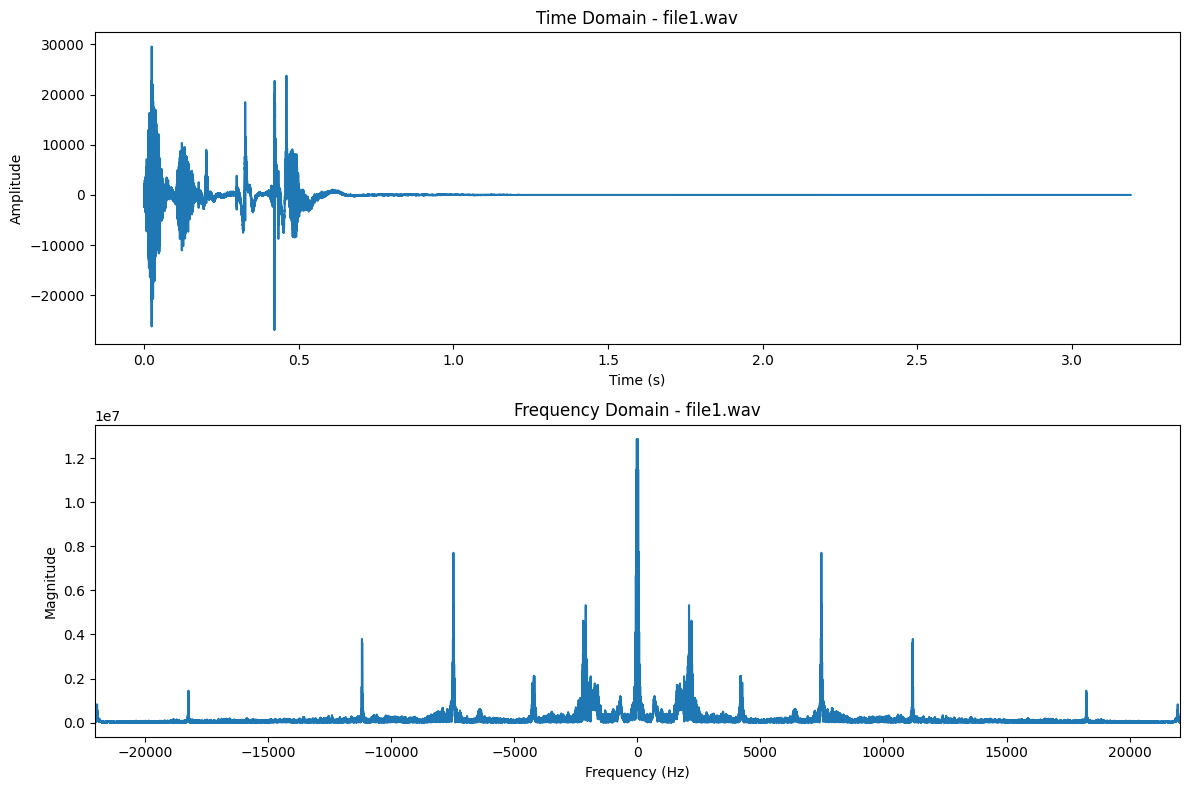


Top 3 frequencies for file1.wav: [  22.88401254 7476.17554859 2098.11912226] Hz
file2.wav is stereo. Averaging channels.


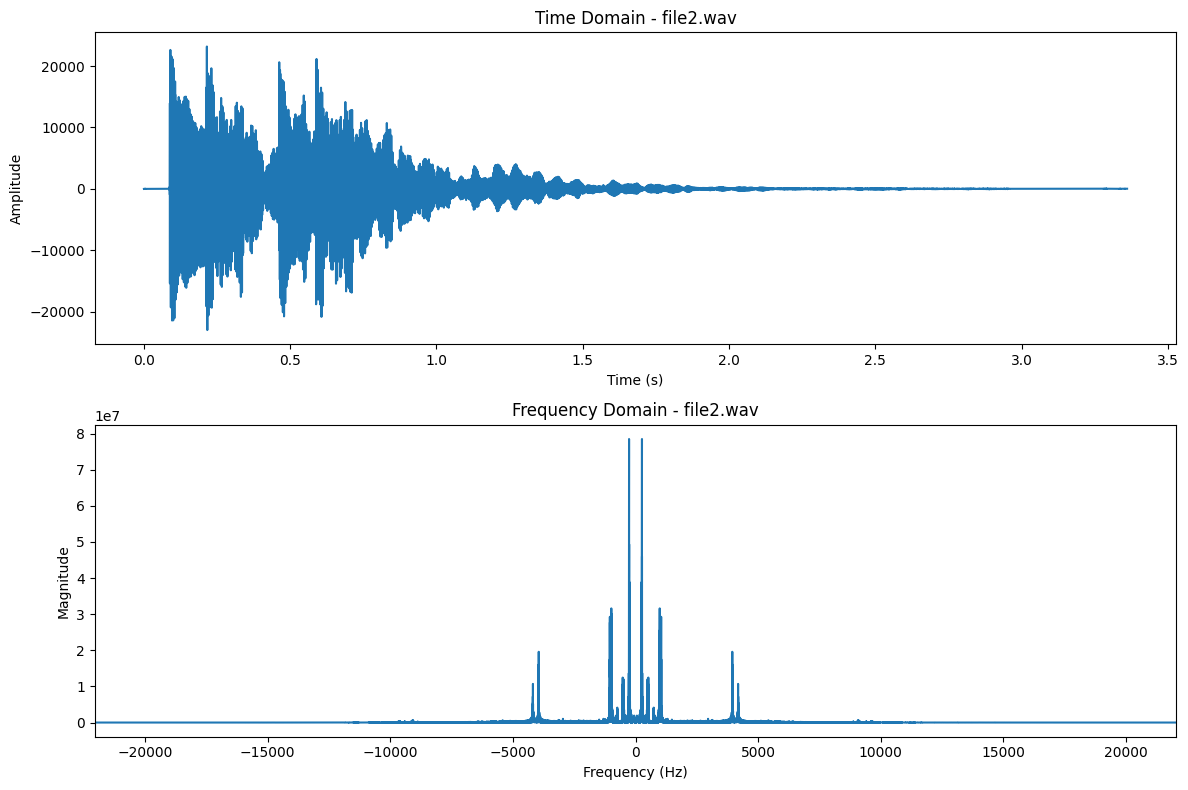


Top 3 frequencies for file2.wav: [ 263.34664849  987.02918989 3946.33135855] Hz

1.3) Analysis and comparison:
(Write your analysis here, comparing the frequencies and sounds of the two files)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks

def analyze_audio(filename):
    # Read the WAV file
    sample_rate, data = wavfile.read(filename)
    
    # Check if the audio is stereo and average if it is
    if len(data.shape) == 2:
        print(f"{filename} is stereo. Averaging channels.")
        data = np.mean(data, axis=1)
    else:
        print(f"{filename} is mono.")

    # Time domain plot
    time = np.arange(len(data)) / sample_rate
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.plot(time, data)
    plt.title(f'Time Domain - {filename}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Compute and plot frequency spectrum
    spectrum = np.fft.fft(data)
    freq = np.fft.fftfreq(len(spectrum), 1/sample_rate)
    plt.subplot(2, 1, 2)
    plt.plot(np.fft.fftshift(freq), np.abs(np.fft.fftshift(spectrum)))
    plt.title(f'Frequency Domain - {filename}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(-sample_rate/2, sample_rate/2)
    plt.tight_layout()
    plt.show()

    return sample_rate, spectrum

def find_top_frequencies(spectrum, sample_rate, n_peaks=3, min_distance=200):
    # Remove DC component and consider only positive frequencies
    positive_spectrum = np.abs(spectrum[1:len(spectrum)//2])
    
    # Find peaks with a minimum distance
    peaks, _ = find_peaks(positive_spectrum, distance=min_distance)
    
    # Sort peaks by magnitude and get top n_peaks
    top_peak_indices = peaks[np.argsort(positive_spectrum[peaks])][-n_peaks:][::-1]
    
    # Convert indices to frequencies
    freq = np.fft.fftfreq(len(spectrum), 1/sample_rate)
    top_frequencies = freq[top_peak_indices + 1]  # +1 to account for removed DC
    
    return top_frequencies

# Analyze both files
for filename in ['file1.wav', 'file2.wav']:
    sample_rate, spectrum = analyze_audio(filename)
    top_freqs = find_top_frequencies(spectrum, sample_rate)
    print(f"\nTop 3 frequencies for {filename}: {top_freqs} Hz")

print("\n1.3) Analysis and comparison:")
print("(Write your analysis here, comparing the frequencies and sounds of the two files)")

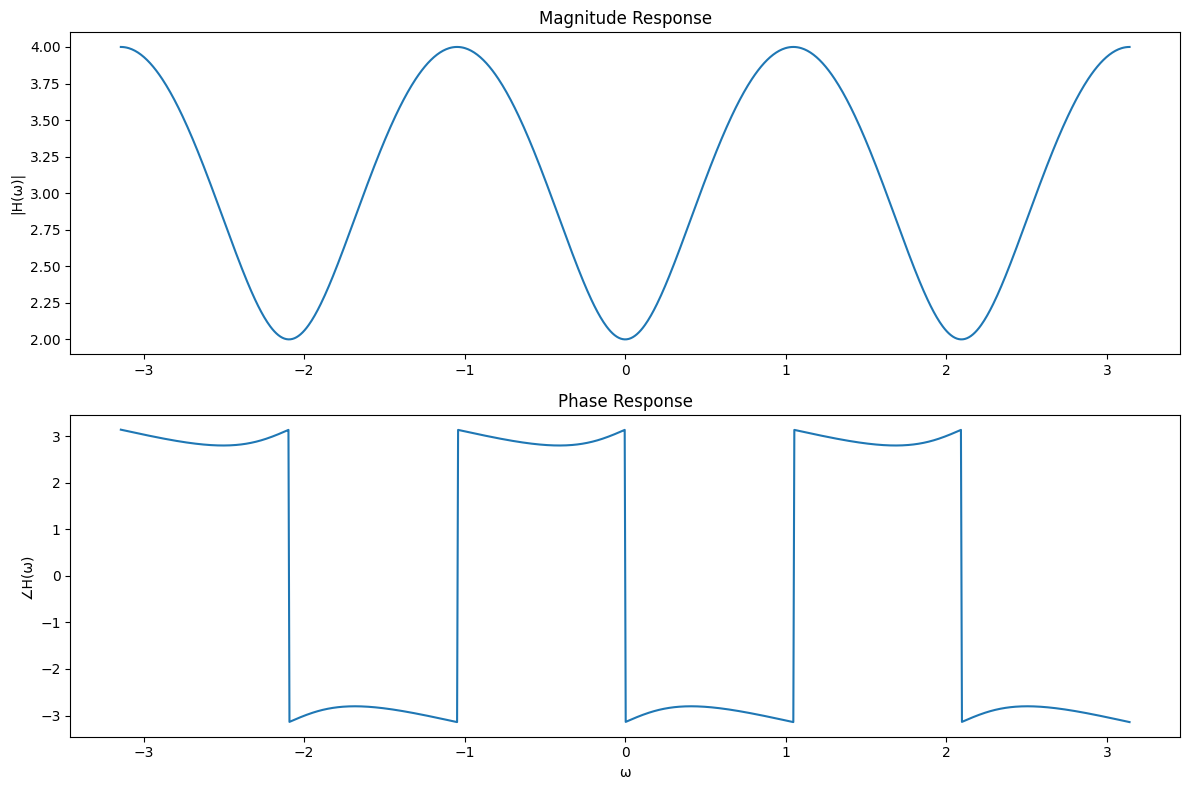

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
a1, a2, a3 = -3, -1, 2
n1, n2 = -3, -3

# 2.1) Impulse response and frequency response
def impulse_response(n):
    return a1 * (n == 0) + a2 * (n == -n1) + a3 * (n == -n2)

def frequency_response(omega):
    return a1 + a2 * np.exp(1j * omega * n1) + a3 * np.exp(1j * omega * n2)

# 2.2) Plot magnitude and phase of frequency response
omega = np.linspace(-np.pi, np.pi, 1000)
H = frequency_response(omega)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(omega, np.abs(H))
plt.title('Magnitude Response')
plt.ylabel('|H(ω)|')

plt.subplot(2, 1, 2)
plt.plot(omega, np.angle(H))
plt.title('Phase Response')
plt.xlabel('ω')
plt.ylabel('∠H(ω)')
plt.tight_layout()
plt.show()


In [1]:

# 2.3) DFT of system output
student_id = "6531313221"  # Replace with your ID
x = np.array([int(d) for d in student_id])

N = len(x)
# Compute y[n]
y = a1 * x + a2 * np.roll(x, N-n1) + a3 * np.roll(x, N-n2)
print(y)
# Compute DFT
Y = np.fft.fft(y)
N = len(Y)
k = np.arange(N)  # DFT index

# Plot magnitude spectrum
plt.figure(figsize=(12, 6))
plt.stem(k, np.abs(Y))
plt.title('Magnitude Spectrum of System Output (DFT)')
plt.xlabel('k (DFT index)')
plt.ylabel('|Y[k]|')
plt.grid(True)
plt.show()

# Plot phase spectrum
plt.figure(figsize=(12, 6))
plt.stem(k, np.angle(Y))
plt.title('Phase Spectrum of System Output (DFT)')
plt.xlabel('k (DFT index)')
plt.ylabel('∠Y[k] (radians)')
plt.grid(True)
plt.show()

print("\nExplanation of the solution steps:")
print("(Write your explanation here, covering the computation of y[n], ")
print("the DFT process, and interpretation of the magnitude and phase spectra)")

NameError: name 'np' is not defined